In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pyspark

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("CardiovascularRiskPrediction").getOrCreate()

In [ ]:
file_path = '/content/drive/MyDrive/Project/Cardiovascular Diseases.csv'
df = spark.read.csv(file_path, header=True, inferSchema=True)
df.show()

+--------------+--------------------+--------+-------------+-----------+------------+----------+--------+---------+------+------------+-----------+-----------+-----+---------------+-------------------+-----------------+----------------------------+-----------------------+
|General_Health|             Checkup|Exercise|Heart_Disease|Skin_Cancer|Other_Cancer|Depression|Diabetes|Arthritis|   Sex|Age_Category|Height_(cm)|Weight_(kg)|  BMI|Smoking_History|Alcohol_Consumption|Fruit_Consumption|Green_Vegetables_Consumption|FriedPotato_Consumption|
+--------------+--------------------+--------+-------------+-----------+------------+----------+--------+---------+------+------------+-----------+-----------+-----+---------------+-------------------+-----------------+----------------------------+-----------------------+
|          Poor|Within the past 2...|      No|           No|         No|          No|        No|      No|      Yes|Female|       70-74|        150|      32.66|14.54|            Yes|

In [ ]:
df.printSchema()

from pyspark.sql.functions import col, sum

df.select([sum(col(c).isNull().cast("integer")).alias(c) for c in df.columns]).show()

root
 |-- General_Health: string (nullable = true)
 |-- Checkup: string (nullable = true)
 |-- Exercise: string (nullable = true)
 |-- Heart_Disease: string (nullable = true)
 |-- Skin_Cancer: string (nullable = true)
 |-- Other_Cancer: string (nullable = true)
 |-- Depression: string (nullable = true)
 |-- Diabetes: string (nullable = true)
 |-- Arthritis: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age_Category: string (nullable = true)
 |-- Height_(cm): integer (nullable = true)
 |-- Weight_(kg): double (nullable = true)
 |-- BMI: double (nullable = true)
 |-- Smoking_History: string (nullable = true)
 |-- Alcohol_Consumption: integer (nullable = true)
 |-- Fruit_Consumption: integer (nullable = true)
 |-- Green_Vegetables_Consumption: integer (nullable = true)
 |-- FriedPotato_Consumption: integer (nullable = true)

+--------------+-------+--------+-------------+-----------+------------+----------+--------+---------+---+------------+-----------+-----------+---+

In [ ]:
df.printSchema()
df.show(5)

root
 |-- General_Health: string (nullable = true)
 |-- Checkup: string (nullable = true)
 |-- Exercise: string (nullable = true)
 |-- Heart_Disease: string (nullable = true)
 |-- Skin_Cancer: string (nullable = true)
 |-- Other_Cancer: string (nullable = true)
 |-- Depression: string (nullable = true)
 |-- Diabetes: string (nullable = true)
 |-- Arthritis: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age_Category: string (nullable = true)
 |-- Height_(cm): integer (nullable = true)
 |-- Weight_(kg): double (nullable = true)
 |-- BMI: double (nullable = true)
 |-- Smoking_History: string (nullable = true)
 |-- Alcohol_Consumption: integer (nullable = true)
 |-- Fruit_Consumption: integer (nullable = true)
 |-- Green_Vegetables_Consumption: integer (nullable = true)
 |-- FriedPotato_Consumption: integer (nullable = true)

+--------------+--------------------+--------+-------------+-----------+------------+----------+--------+---------+------+------------+-----------+

In [ ]:
from pyspark.sql.functions import col, when

df = df.withColumn(
    'Age',
    when(col('Age_Category') == '18-24', 21)
    .when(col('Age_Category') == '25-29', 27)
    .when(col('Age_Category') == '30-34', 32)
    .when(col('Age_Category') == '35-39', 37)
    .when(col('Age_Category') == '40-44', 42)
    .when(col('Age_Category') == '45-49', 47)
    .when(col('Age_Category') == '50-54', 52)
    .when(col('Age_Category') == '55-59', 57)
    .when(col('Age_Category') == '60-64', 62)
    .when(col('Age_Category') == '65-69', 67)
    .when(col('Age_Category') == '70-74', 72)
    .when(col('Age_Category') == '75-79', 77)
    .when(col('Age_Category') == '80+', 80) # Keep 80 for 80+
    .otherwise(None) # Handle any unexpected categories
)
df.select('Age_Category', 'Age').show(5)

+------------+---+
|Age_Category|Age|
+------------+---+
|       70-74| 72|
|       70-74| 72|
|       60-64| 62|
|       75-79| 77|
|         80+| 80|
+------------+---+
only showing top 5 rows



In [ ]:
from pyspark.sql.functions import min, max

age_stats = df.agg(min("Age").alias("min_age"), max("Age").alias("max_age"))
age_stats.show()

+-------+-------+
|min_age|max_age|
+-------+-------+
|     21|     80|
+-------+-------+



In [ ]:
age_stats.show()

+-------+-------+
|min_age|max_age|
+-------+-------+
|     21|     80|
+-------+-------+



In [ ]:
df.show()

+--------------+--------------------+--------+-------------+-----------+------------+----------+--------+---------+------+------------+-----------+-----------+-----+---------------+-------------------+-----------------+----------------------------+-----------------------+---+
|General_Health|             Checkup|Exercise|Heart_Disease|Skin_Cancer|Other_Cancer|Depression|Diabetes|Arthritis|   Sex|Age_Category|Height_(cm)|Weight_(kg)|  BMI|Smoking_History|Alcohol_Consumption|Fruit_Consumption|Green_Vegetables_Consumption|FriedPotato_Consumption|Age|
+--------------+--------------------+--------+-------------+-----------+------------+----------+--------+---------+------+------------+-----------+-----------+-----+---------------+-------------------+-----------------+----------------------------+-----------------------+---+
|          Poor|Within the past 2...|      No|           No|         No|          No|        No|      No|      Yes|Female|       70-74|        150|      32.66|14.54|    

In [ ]:
df = df.drop('Age_Category')
df.printSchema()

root
 |-- General_Health: string (nullable = true)
 |-- Checkup: string (nullable = true)
 |-- Exercise: string (nullable = true)
 |-- Heart_Disease: string (nullable = true)
 |-- Skin_Cancer: string (nullable = true)
 |-- Other_Cancer: string (nullable = true)
 |-- Depression: string (nullable = true)
 |-- Diabetes: string (nullable = true)
 |-- Arthritis: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Height_(cm): integer (nullable = true)
 |-- Weight_(kg): double (nullable = true)
 |-- BMI: double (nullable = true)
 |-- Smoking_History: string (nullable = true)
 |-- Alcohol_Consumption: integer (nullable = true)
 |-- Fruit_Consumption: integer (nullable = true)
 |-- Green_Vegetables_Consumption: integer (nullable = true)
 |-- FriedPotato_Consumption: integer (nullable = true)
 |-- Age: integer (nullable = true)



In [ ]:
df.show()

+--------------+--------------------+--------+-------------+-----------+------------+----------+--------+---------+------+-----------+-----------+-----+---------------+-------------------+-----------------+----------------------------+-----------------------+---+
|General_Health|             Checkup|Exercise|Heart_Disease|Skin_Cancer|Other_Cancer|Depression|Diabetes|Arthritis|   Sex|Height_(cm)|Weight_(kg)|  BMI|Smoking_History|Alcohol_Consumption|Fruit_Consumption|Green_Vegetables_Consumption|FriedPotato_Consumption|Age|
+--------------+--------------------+--------+-------------+-----------+------------+----------+--------+---------+------+-----------+-----------+-----+---------------+-------------------+-----------------+----------------------------+-----------------------+---+
|          Poor|Within the past 2...|      No|           No|         No|          No|        No|      No|      Yes|Female|        150|      32.66|14.54|            Yes|                  0|               30|  

In [ ]:
df.select("Checkup").distinct().show()

+--------------------+
|             Checkup|
+--------------------+
|               Never|
|Within the past year|
|Within the past 2...|
|Within the past 5...|
| 5 or more years ago|
+--------------------+



## Label Encode 'Checkup' Column

In [ ]:
from pyspark.sql.functions import col, when

df = df.withColumn(
    "Checkup_Encoded",
    when(col("Checkup") == "Never", 0)
    .when(col("Checkup") == "Within the past year", 4)
    .when(col("Checkup") == "Within the past 2 years", 3)
    .when(col("Checkup") == "Within the past 5 years", 2)
    .when(col("Checkup") == "5 or more years ago", 1)
    .otherwise(None) # Handle any unexpected values
)

df.select("Checkup", "Checkup_Encoded").show(10)

+--------------------+---------------+
|             Checkup|Checkup_Encoded|
+--------------------+---------------+
|Within the past 2...|              3|
|Within the past year|              4|
|Within the past year|              4|
|Within the past year|              4|
|Within the past year|              4|
|Within the past year|              4|
|Within the past year|              4|
|Within the past year|              4|
|Within the past year|              4|
|Within the past year|              4|
+--------------------+---------------+
only showing top 10 rows



In [ ]:
df.show()

+--------------+--------------------+--------+-------------+-----------+------------+----------+--------+---------+------+-----------+-----------+-----+---------------+-------------------+-----------------+----------------------------+-----------------------+---+---------------+
|General_Health|             Checkup|Exercise|Heart_Disease|Skin_Cancer|Other_Cancer|Depression|Diabetes|Arthritis|   Sex|Height_(cm)|Weight_(kg)|  BMI|Smoking_History|Alcohol_Consumption|Fruit_Consumption|Green_Vegetables_Consumption|FriedPotato_Consumption|Age|Checkup_Encoded|
+--------------+--------------------+--------+-------------+-----------+------------+----------+--------+---------+------+-----------+-----------+-----+---------------+-------------------+-----------------+----------------------------+-----------------------+---+---------------+
|          Poor|Within the past 2...|      No|           No|         No|          No|        No|      No|      Yes|Female|        150|      32.66|14.54|        

In [ ]:
df=df.drop('Checkup')

In [ ]:
df.show()

+--------------+--------+-------------+-----------+------------+----------+--------+---------+------+-----------+-----------+-----+---------------+-------------------+-----------------+----------------------------+-----------------------+---+---------------+
|General_Health|Exercise|Heart_Disease|Skin_Cancer|Other_Cancer|Depression|Diabetes|Arthritis|   Sex|Height_(cm)|Weight_(kg)|  BMI|Smoking_History|Alcohol_Consumption|Fruit_Consumption|Green_Vegetables_Consumption|FriedPotato_Consumption|Age|Checkup_Encoded|
+--------------+--------+-------------+-----------+------------+----------+--------+---------+------+-----------+-----------+-----+---------------+-------------------+-----------------+----------------------------+-----------------------+---+---------------+
|          Poor|      No|           No|         No|          No|        No|      No|      Yes|Female|        150|      32.66|14.54|            Yes|                  0|               30|                          16|         

In [ ]:
df.select('General_Health').distinct().show()


+--------------+
|General_Health|
+--------------+
|     Excellent|
|          Good|
|          Fair|
|     Very Good|
|          Poor|
+--------------+



In [ ]:

df = df.withColumn(
    "General_Health_Encoded",
    when(col("General_Health") == "Poor", 0)
    .when(col("General_Health") == "Fair", 1)
    .when(col("General_Health") == "Good", 2)
    .when(col("General_Health") == "Very Good", 3)
    .when(col("General_Health") == "Excellent", 4)
    .otherwise(None) # Handle any unexpected values
)

df.select("General_Health", "General_Health_Encoded").show(10)

+--------------+----------------------+
|General_Health|General_Health_Encoded|
+--------------+----------------------+
|          Poor|                     0|
|     Very Good|                     3|
|     Very Good|                     3|
|          Poor|                     0|
|          Good|                     2|
|          Good|                     2|
|          Fair|                     1|
|          Good|                     2|
|          Fair|                     1|
|          Fair|                     1|
+--------------+----------------------+
only showing top 10 rows



In [ ]:
df = df.drop('General_Health')

In [ ]:
df.show()

+--------+-------------+-----------+------------+----------+--------+---------+------+-----------+-----------+-----+---------------+-------------------+-----------------+----------------------------+-----------------------+---+---------------+----------------------+
|Exercise|Heart_Disease|Skin_Cancer|Other_Cancer|Depression|Diabetes|Arthritis|   Sex|Height_(cm)|Weight_(kg)|  BMI|Smoking_History|Alcohol_Consumption|Fruit_Consumption|Green_Vegetables_Consumption|FriedPotato_Consumption|Age|Checkup_Encoded|General_Health_Encoded|
+--------+-------------+-----------+------------+----------+--------+---------+------+-----------+-----------+-----+---------------+-------------------+-----------------+----------------------------+-----------------------+---+---------------+----------------------+
|      No|           No|         No|          No|        No|      No|      Yes|Female|        150|      32.66|14.54|            Yes|                  0|               30|                          16|

## Label Encode Binary Columns



In [ ]:
from pyspark.sql.functions import col, when

binary_columns = [
    "Exercise",
    "Heart_Disease",
    "Skin_Cancer",
    "Other_Cancer",
    "Depression",
    "Arthritis",
    "Diabetes",
    "Smoking_History"
]

for column in binary_columns:
    df = df.withColumn(
        f"{column}_Encoded",
        when(col(column) == "Yes", 1)
        .when(col(column) == "No", 0)
        .otherwise(None)  # Handle any unexpected values
    )

# Show the original and encoded columns for verification
df.select(
    *binary_columns,
    *[f"{column}_Encoded" for column in binary_columns]
).show(10)

+--------+-------------+-----------+------------+----------+---------+--------+---------------+----------------+---------------------+-------------------+--------------------+------------------+-----------------+----------------+-----------------------+
|Exercise|Heart_Disease|Skin_Cancer|Other_Cancer|Depression|Arthritis|Diabetes|Smoking_History|Exercise_Encoded|Heart_Disease_Encoded|Skin_Cancer_Encoded|Other_Cancer_Encoded|Depression_Encoded|Arthritis_Encoded|Diabetes_Encoded|Smoking_History_Encoded|
+--------+-------------+-----------+------------+----------+---------+--------+---------------+----------------+---------------------+-------------------+--------------------+------------------+-----------------+----------------+-----------------------+
|      No|           No|         No|          No|        No|      Yes|      No|            Yes|               0|                    0|                  0|                   0|                 0|                1|               0|         

In [ ]:
df.show()

+--------+-------------+-----------+------------+----------+--------+---------+------+-----------+-----------+-----+---------------+-------------------+-----------------+----------------------------+-----------------------+---+---------------+----------------------+----------------+---------------------+-------------------+--------------------+------------------+-----------------+----------------+-----------------------+
|Exercise|Heart_Disease|Skin_Cancer|Other_Cancer|Depression|Diabetes|Arthritis|   Sex|Height_(cm)|Weight_(kg)|  BMI|Smoking_History|Alcohol_Consumption|Fruit_Consumption|Green_Vegetables_Consumption|FriedPotato_Consumption|Age|Checkup_Encoded|General_Health_Encoded|Exercise_Encoded|Heart_Disease_Encoded|Skin_Cancer_Encoded|Other_Cancer_Encoded|Depression_Encoded|Arthritis_Encoded|Diabetes_Encoded|Smoking_History_Encoded|
+--------+-------------+-----------+------------+----------+--------+---------+------+-----------+-----------+-----+---------------+------------------

## Drop Original Binary Columns



In [ ]:
# Original binary columns to drop
original_binary_columns = [
    "Exercise",
    "Heart_Disease",
    "Skin_Cancer",
    "Other_Cancer",
    "Depression",
    "Arthritis",
    "Diabetes",
    "Smoking_History"
]

df = df.drop(*original_binary_columns)
df.printSchema()

root
 |-- Sex: string (nullable = true)
 |-- Height_(cm): integer (nullable = true)
 |-- Weight_(kg): double (nullable = true)
 |-- BMI: double (nullable = true)
 |-- Alcohol_Consumption: integer (nullable = true)
 |-- Fruit_Consumption: integer (nullable = true)
 |-- Green_Vegetables_Consumption: integer (nullable = true)
 |-- FriedPotato_Consumption: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Checkup_Encoded: integer (nullable = true)
 |-- General_Health_Encoded: integer (nullable = true)
 |-- Exercise_Encoded: integer (nullable = true)
 |-- Heart_Disease_Encoded: integer (nullable = true)
 |-- Skin_Cancer_Encoded: integer (nullable = true)
 |-- Other_Cancer_Encoded: integer (nullable = true)
 |-- Depression_Encoded: integer (nullable = true)
 |-- Arthritis_Encoded: integer (nullable = true)
 |-- Diabetes_Encoded: integer (nullable = true)
 |-- Smoking_History_Encoded: integer (nullable = true)



In [ ]:
df.show()

+------+-----------+-----------+-----+-------------------+-----------------+----------------------------+-----------------------+---+---------------+----------------------+----------------+---------------------+-------------------+--------------------+------------------+-----------------+----------------+-----------------------+
|   Sex|Height_(cm)|Weight_(kg)|  BMI|Alcohol_Consumption|Fruit_Consumption|Green_Vegetables_Consumption|FriedPotato_Consumption|Age|Checkup_Encoded|General_Health_Encoded|Exercise_Encoded|Heart_Disease_Encoded|Skin_Cancer_Encoded|Other_Cancer_Encoded|Depression_Encoded|Arthritis_Encoded|Diabetes_Encoded|Smoking_History_Encoded|
+------+-----------+-----------+-----+-------------------+-----------------+----------------------------+-----------------------+---+---------------+----------------------+----------------+---------------------+-------------------+--------------------+------------------+-----------------+----------------+-----------------------+
|Female

## One Hot Encoding
-- Gender Column

In [ ]:
# Create 'Male' and 'Female' columns based on the original 'Sex' column
df = df.withColumn("Female", when(col("Sex") == "Female", 1).otherwise(0))
df = df.withColumn("Male", when(col("Sex") == "Male", 1).otherwise(0))


# Show the original and new Male and Female columns
df.select("Sex", "Female", "Male").show(10)

+------+------+----+
|   Sex|Female|Male|
+------+------+----+
|Female|     1|   0|
|Female|     1|   0|
|Female|     1|   0|
|  Male|     0|   1|
|  Male|     0|   1|
|  Male|     0|   1|
|  Male|     0|   1|
|Female|     1|   0|
|Female|     1|   0|
|Female|     1|   0|
+------+------+----+
only showing top 10 rows



In [ ]:
df = df.drop('Sex')
df.printSchema()

root
 |-- Height_(cm): integer (nullable = true)
 |-- Weight_(kg): double (nullable = true)
 |-- BMI: double (nullable = true)
 |-- Alcohol_Consumption: integer (nullable = true)
 |-- Fruit_Consumption: integer (nullable = true)
 |-- Green_Vegetables_Consumption: integer (nullable = true)
 |-- FriedPotato_Consumption: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Checkup_Encoded: integer (nullable = true)
 |-- General_Health_Encoded: integer (nullable = true)
 |-- Exercise_Encoded: integer (nullable = true)
 |-- Heart_Disease_Encoded: integer (nullable = true)
 |-- Skin_Cancer_Encoded: integer (nullable = true)
 |-- Other_Cancer_Encoded: integer (nullable = true)
 |-- Depression_Encoded: integer (nullable = true)
 |-- Arthritis_Encoded: integer (nullable = true)
 |-- Diabetes_Encoded: integer (nullable = true)
 |-- Smoking_History_Encoded: integer (nullable = true)
 |-- Female: integer (nullable = false)
 |-- Male: integer (nullable = false)



In [ ]:
df.show()

+-----------+-----------+-----+-------------------+-----------------+----------------------------+-----------------------+---+---------------+----------------------+----------------+---------------------+-------------------+--------------------+------------------+-----------------+----------------+-----------------------+------+----+
|Height_(cm)|Weight_(kg)|  BMI|Alcohol_Consumption|Fruit_Consumption|Green_Vegetables_Consumption|FriedPotato_Consumption|Age|Checkup_Encoded|General_Health_Encoded|Exercise_Encoded|Heart_Disease_Encoded|Skin_Cancer_Encoded|Other_Cancer_Encoded|Depression_Encoded|Arthritis_Encoded|Diabetes_Encoded|Smoking_History_Encoded|Female|Male|
+-----------+-----------+-----+-------------------+-----------------+----------------------------+-----------------------+---+---------------+----------------------+----------------+---------------------+-------------------+--------------------+------------------+-----------------+----------------+-----------------------+-----

In [ ]:
df.show()

+-----------+-----------+-----+-------------------+-----------------+----------------------------+-----------------------+---+---------------+----------------------+----------------+---------------------+-------------------+--------------------+------------------+-----------------+----------------+-----------------------+------+----+
|Height_(cm)|Weight_(kg)|  BMI|Alcohol_Consumption|Fruit_Consumption|Green_Vegetables_Consumption|FriedPotato_Consumption|Age|Checkup_Encoded|General_Health_Encoded|Exercise_Encoded|Heart_Disease_Encoded|Skin_Cancer_Encoded|Other_Cancer_Encoded|Depression_Encoded|Arthritis_Encoded|Diabetes_Encoded|Smoking_History_Encoded|Female|Male|
+-----------+-----------+-----+-------------------+-----------------+----------------------------+-----------------------+---+---------------+----------------------+----------------+---------------------+-------------------+--------------------+------------------+-----------------+----------------+-----------------------+-----

In [ ]:
df.schema.fields

[StructField('Height_(cm)', IntegerType(), True),
 StructField('Weight_(kg)', DoubleType(), True),
 StructField('BMI', DoubleType(), True),
 StructField('Alcohol_Consumption', IntegerType(), True),
 StructField('Fruit_Consumption', IntegerType(), True),
 StructField('Green_Vegetables_Consumption', IntegerType(), True),
 StructField('FriedPotato_Consumption', IntegerType(), True),
 StructField('Age', IntegerType(), True),
 StructField('Checkup_Encoded', IntegerType(), True),
 StructField('General_Health_Encoded', IntegerType(), True),
 StructField('Exercise_Encoded', IntegerType(), True),
 StructField('Heart_Disease_Encoded', IntegerType(), True),
 StructField('Skin_Cancer_Encoded', IntegerType(), True),
 StructField('Other_Cancer_Encoded', IntegerType(), True),
 StructField('Depression_Encoded', IntegerType(), True),
 StructField('Arthritis_Encoded', IntegerType(), True),
 StructField('Diabetes_Encoded', IntegerType(), True),
 StructField('Smoking_History_Encoded', IntegerType(), True)

In [ ]:
numerical_cols = [field.name for field in df.schema.fields if field.dataType.typeName() in ["integer", "double", "float"]]
print("Numerical columns:", numerical_cols)
print("Number of Cols:", len(numerical_cols))

Numerical columns: ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption', 'Age', 'Checkup_Encoded', 'General_Health_Encoded', 'Exercise_Encoded', 'Heart_Disease_Encoded', 'Skin_Cancer_Encoded', 'Other_Cancer_Encoded', 'Depression_Encoded', 'Arthritis_Encoded', 'Diabetes_Encoded', 'Smoking_History_Encoded', 'Female', 'Male']
Number of Cols: 20


In [ ]:
from pyspark.sql.functions import col, when

df = df.withColumn(
    "BMI_Category",
    when(col("BMI") < 18.5, "Underweight")
    .when((col("BMI") >= 18.5) & (col("BMI") < 25), "Normal weight")
    .when((col("BMI") >= 25) & (col("BMI") < 30), "Overweight")
    .when(col("BMI") >= 30, "Obesity")
    .otherwise("Unknown") # Handle any unexpected values
)

df.select("BMI", "BMI_Category").show(10)

+-----+-------------+
|  BMI| BMI_Category|
+-----+-------------+
|14.54|  Underweight|
|28.29|   Overweight|
|33.47|      Obesity|
|28.73|   Overweight|
|24.37|Normal weight|
|46.11|      Obesity|
|22.74|Normal weight|
|39.94|      Obesity|
|27.46|   Overweight|
|34.67|      Obesity|
+-----+-------------+
only showing top 10 rows



In [ ]:
df.show()

+-----------+-----------+-----+-------------------+-----------------+----------------------------+-----------------------+---+---------------+----------------------+----------------+---------------------+-------------------+--------------------+------------------+-----------------+----------------+-----------------------+------+----+-------------+
|Height_(cm)|Weight_(kg)|  BMI|Alcohol_Consumption|Fruit_Consumption|Green_Vegetables_Consumption|FriedPotato_Consumption|Age|Checkup_Encoded|General_Health_Encoded|Exercise_Encoded|Heart_Disease_Encoded|Skin_Cancer_Encoded|Other_Cancer_Encoded|Depression_Encoded|Arthritis_Encoded|Diabetes_Encoded|Smoking_History_Encoded|Female|Male| BMI_Category|
+-----------+-----------+-----+-------------------+-----------------+----------------------------+-----------------------+---+---------------+----------------------+----------------+---------------------+-------------------+--------------------+------------------+-----------------+----------------+-

In [ ]:
from pyspark.sql.functions import col, when

df = df.withColumn(
    "BMI_Category_Encoded",  # Create a new column for the encoded values
    when(col("BMI_Category") == "Obesity", 0)
    .when(col("BMI_Category") == "Overweight", 1)
    .when(col("BMI_Category") == "Normal weight", 2)
    .when(col("BMI_Category") == "Underweight", 0) # Note: Underweight is also mapped to 0
    .otherwise(None) # Handle any unexpected values
)

df.select("BMI_Category", "BMI_Category_Encoded").show(10)

+-------------+--------------------+
| BMI_Category|BMI_Category_Encoded|
+-------------+--------------------+
|  Underweight|                   0|
|   Overweight|                   1|
|      Obesity|                   0|
|   Overweight|                   1|
|Normal weight|                   2|
|      Obesity|                   0|
|Normal weight|                   2|
|      Obesity|                   0|
|   Overweight|                   1|
|      Obesity|                   0|
+-------------+--------------------+
only showing top 10 rows



In [ ]:
df.show(10), len(df.columns)

+-----------+-----------+-----+-------------------+-----------------+----------------------------+-----------------------+---+---------------+----------------------+----------------+---------------------+-------------------+--------------------+------------------+-----------------+----------------+-----------------------+------+----+-------------+--------------------+
|Height_(cm)|Weight_(kg)|  BMI|Alcohol_Consumption|Fruit_Consumption|Green_Vegetables_Consumption|FriedPotato_Consumption|Age|Checkup_Encoded|General_Health_Encoded|Exercise_Encoded|Heart_Disease_Encoded|Skin_Cancer_Encoded|Other_Cancer_Encoded|Depression_Encoded|Arthritis_Encoded|Diabetes_Encoded|Smoking_History_Encoded|Female|Male| BMI_Category|BMI_Category_Encoded|
+-----------+-----------+-----+-------------------+-----------------+----------------------------+-----------------------+---+---------------+----------------------+----------------+---------------------+-------------------+--------------------+-------------

(None, 22)

In [ ]:
df=df.drop('BMI_Category')

In [ ]:
df.show(10), len(df.columns)

+-----------+-----------+-----+-------------------+-----------------+----------------------------+-----------------------+---+---------------+----------------------+----------------+---------------------+-------------------+--------------------+------------------+-----------------+----------------+-----------------------+------+----+--------------------+
|Height_(cm)|Weight_(kg)|  BMI|Alcohol_Consumption|Fruit_Consumption|Green_Vegetables_Consumption|FriedPotato_Consumption|Age|Checkup_Encoded|General_Health_Encoded|Exercise_Encoded|Heart_Disease_Encoded|Skin_Cancer_Encoded|Other_Cancer_Encoded|Depression_Encoded|Arthritis_Encoded|Diabetes_Encoded|Smoking_History_Encoded|Female|Male|BMI_Category_Encoded|
+-----------+-----------+-----+-------------------+-----------------+----------------------------+-----------------------+---+---------------+----------------------+----------------+---------------------+-------------------+--------------------+------------------+-----------------+----

(None, 21)

In [ ]:
pdf = df.toPandas()
import matplotlib.pyplot as plt
import seaborn as sns

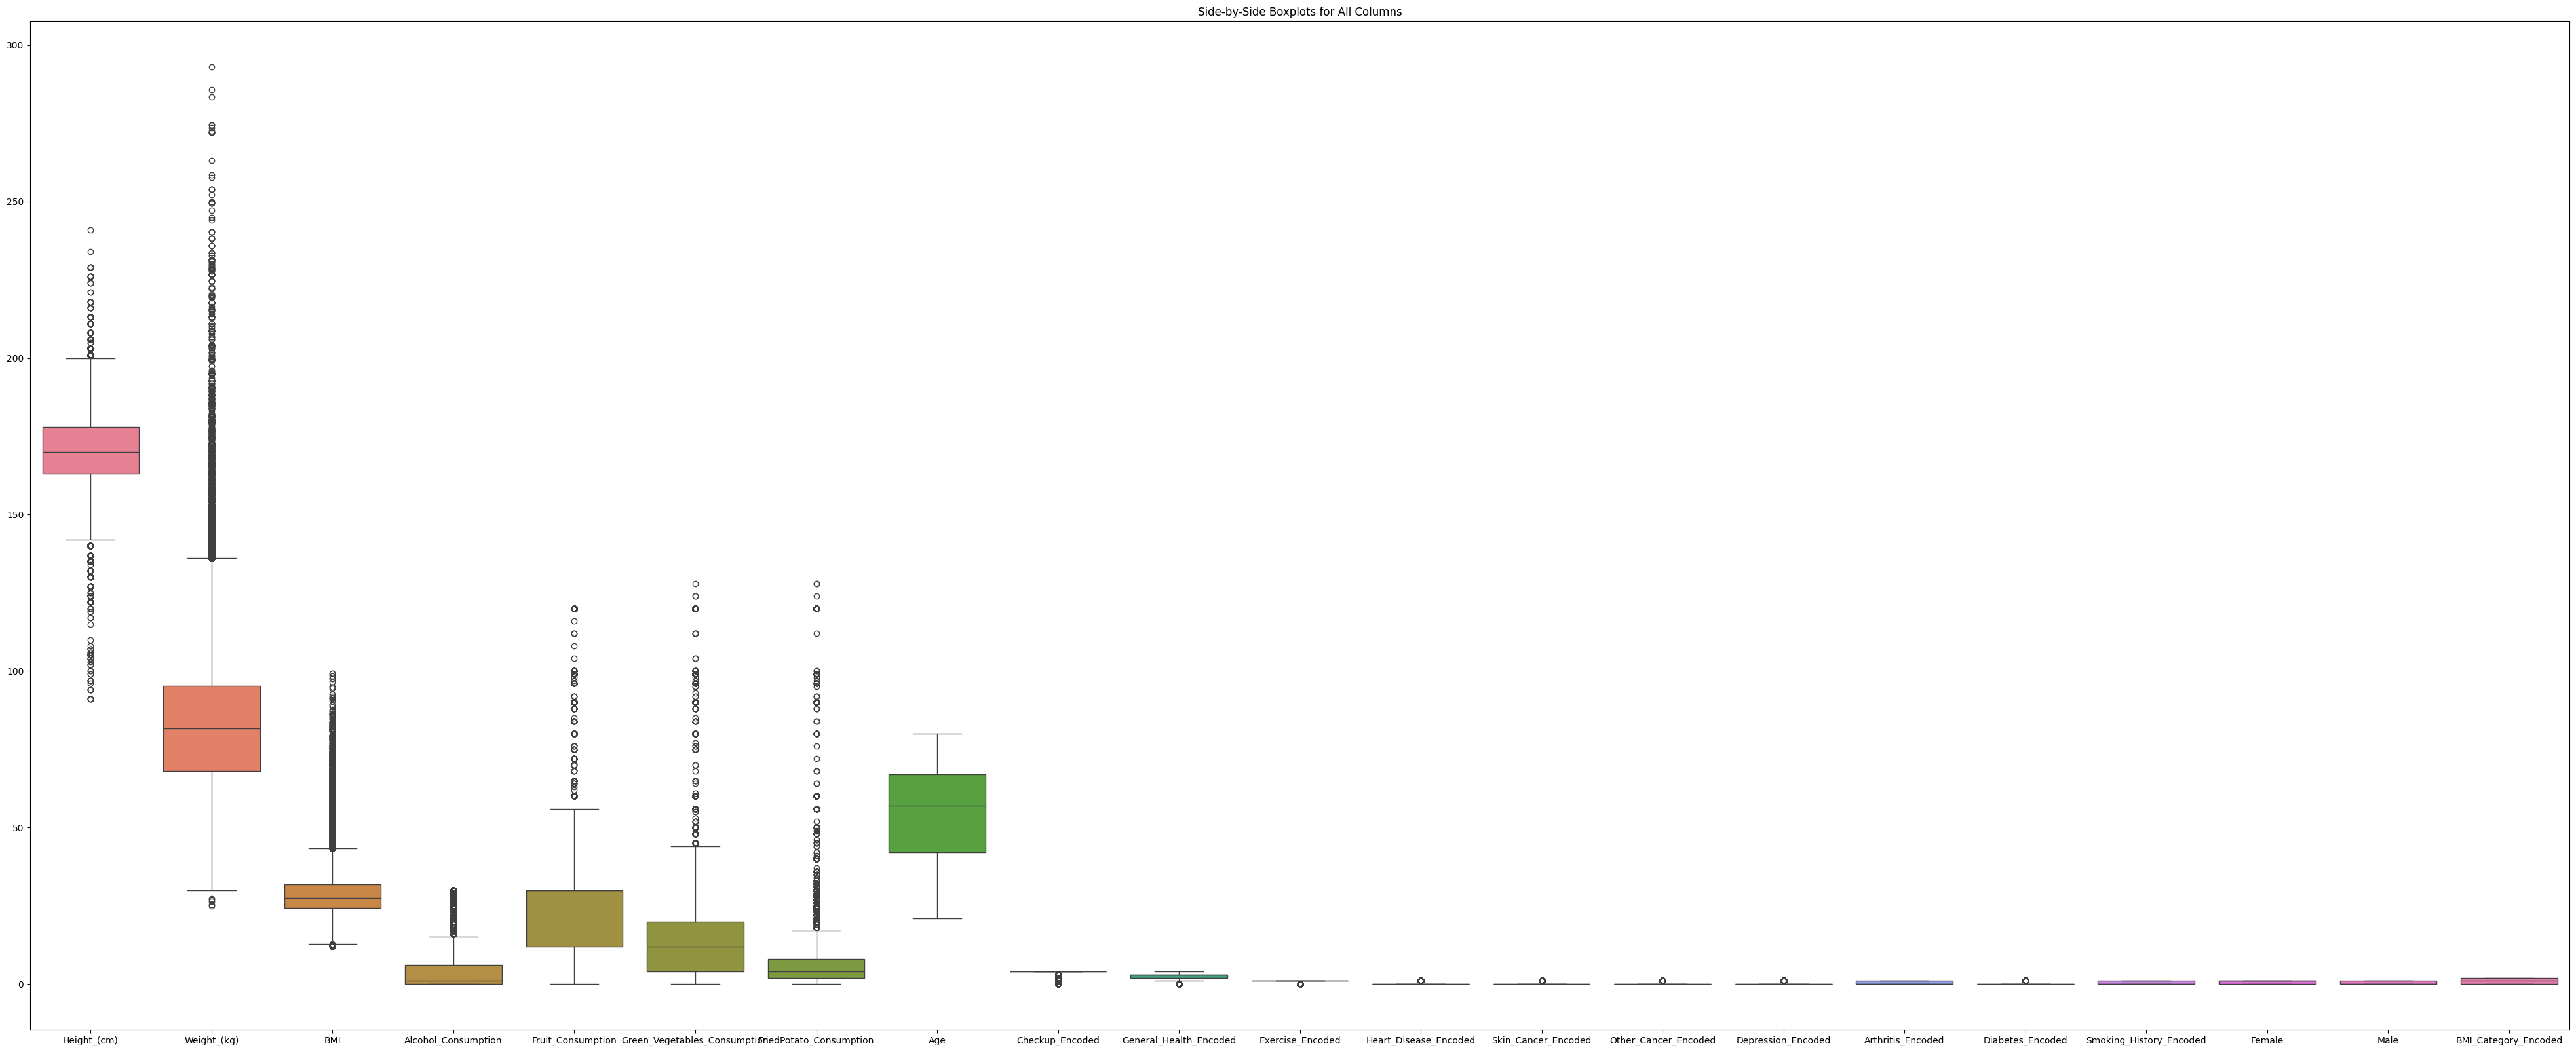

In [ ]:
plt.figure(figsize=(50, 20))
sns.boxplot(data=pdf)
plt.title("Side-by-Side Boxplots for All Columns")
plt.show()

## outlier detection (IQR Method)

In [ ]:
numerical_cols

['Height_(cm)',
 'Weight_(kg)',
 'BMI',
 'Alcohol_Consumption',
 'Fruit_Consumption',
 'Green_Vegetables_Consumption',
 'FriedPotato_Consumption',
 'Age',
 'Checkup_Encoded',
 'General_Health_Encoded',
 'Exercise_Encoded',
 'Heart_Disease_Encoded',
 'Skin_Cancer_Encoded',
 'Other_Cancer_Encoded',
 'Depression_Encoded',
 'Arthritis_Encoded',
 'Diabetes_Encoded',
 'Smoking_History_Encoded',
 'Female',
 'Male']

In [ ]:
from pyspark.sql.functions import col, expr

# Calculate Q1 and Q3 for each numerical column
cols_to_handle=['Height_(cm)','Weight_(kg)','BMI','Alcohol_Consumption','Fruit_Consumption','Green_Vegetables_Consumption','FriedPotato_Consumption']

quantiles = df.stat.approxQuantile(cols_to_handle, [0.25, 0.75], 0.05)

# Identify outliers using IQR for each numerical column
for i, col_name in enumerate(cols_to_handle):
    q1 = quantiles[i][0]
    q3 = quantiles[i][1]
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    print(f"Outliers in {col_name}: Before")
    print(df.filter((col(col_name) < lower_bound) | (col(col_name) > upper_bound)).count())
    df = df.withColumn(
        col_name,
        when(col(col_name) < lower_bound, lower_bound)
        .when(col(col_name) > upper_bound, upper_bound)
        .otherwise(col(col_name))
    )
    print(f"Outliers in {col_name}: After")
    print(df.filter((col(col_name) < lower_bound) | (col(col_name) > upper_bound)).count())

Outliers in Height_(cm): Before
1055
Outliers in Height_(cm): After
0
Outliers in Weight_(kg): Before
9477
Outliers in Weight_(kg): After
0
Outliers in BMI: Before
12783
Outliers in BMI: After
0
Outliers in Alcohol_Consumption: Before
36147
Outliers in Alcohol_Consumption: After
0
Outliers in Fruit_Consumption: Before
68225
Outliers in Fruit_Consumption: After
0
Outliers in Green_Vegetables_Consumption: Before
11878
Outliers in Green_Vegetables_Consumption: After
0
Outliers in FriedPotato_Consumption: Before
19456
Outliers in FriedPotato_Consumption: After
0


In [ ]:
print(df.select().count())
df.show()

308854
+-----------+------------------+------+-------------------+-----------------+----------------------------+-----------------------+---+---------------+----------------------+----------------+---------------------+-------------------+--------------------+------------------+-----------------+----------------+-----------------------+------+----+--------------------+
|Height_(cm)|       Weight_(kg)|   BMI|Alcohol_Consumption|Fruit_Consumption|Green_Vegetables_Consumption|FriedPotato_Consumption|Age|Checkup_Encoded|General_Health_Encoded|Exercise_Encoded|Heart_Disease_Encoded|Skin_Cancer_Encoded|Other_Cancer_Encoded|Depression_Encoded|Arthritis_Encoded|Diabetes_Encoded|Smoking_History_Encoded|Female|Male|BMI_Category_Encoded|
+-----------+------------------+------+-------------------+-----------------+----------------------------+-----------------------+---+---------------+----------------------+----------------+---------------------+-------------------+--------------------+----------

In [ ]:
from pyspark.sql.functions import col, count, lit, round

total_rows = df.count()  # total number of rows in the DataFrame

for column in df.columns:
    print(f"Class percentages for column: {column}")
    df.groupBy(column) \
      .agg(round((count(column) / total_rows) * 100, 2).alias("percentage")) \
      .orderBy("percentage", ascending=False) \
      .show()


Class percentages for column: Height_(cm)
+-----------+----------+
|Height_(cm)|percentage|
+-----------+----------+
|      168.0|      8.78|
|      163.0|      8.35|
|      170.0|      8.01|
|      178.0|      7.99|
|      173.0|      7.64|
|      165.0|      7.63|
|      175.0|      7.14|
|      183.0|      7.13|
|      160.0|      6.74|
|      157.0|      6.27|
|      180.0|       6.2|
|      185.0|      3.59|
|      155.0|       3.2|
|      152.0|      2.99|
|      188.0|      2.94|
|      191.0|      1.66|
|      193.0|      1.03|
|      150.0|      0.94|
|      196.0|      0.44|
|      147.0|      0.32|
+-----------+----------+
only showing top 20 rows

Class percentages for column: Weight_(kg)
+-----------+----------+
|Weight_(kg)|percentage|
+-----------+----------+
|      90.72|      5.38|
|      81.65|      4.89|
|      68.04|      4.29|
|      72.57|      4.29|
|      77.11|      3.96|
|      86.18|      3.59|
|       63.5|       3.1|
|     130.41|      3.07|
|      79.38|  

In [ ]:
df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns]).show()

+-----------+-----------+---+-------------------+-----------------+----------------------------+-----------------------+---+---------------+----------------------+----------------+---------------------+-------------------+--------------------+------------------+-----------------+----------------+-----------------------+------+----+--------------------+
|Height_(cm)|Weight_(kg)|BMI|Alcohol_Consumption|Fruit_Consumption|Green_Vegetables_Consumption|FriedPotato_Consumption|Age|Checkup_Encoded|General_Health_Encoded|Exercise_Encoded|Heart_Disease_Encoded|Skin_Cancer_Encoded|Other_Cancer_Encoded|Depression_Encoded|Arthritis_Encoded|Diabetes_Encoded|Smoking_History_Encoded|Female|Male|BMI_Category_Encoded|
+-----------+-----------+---+-------------------+-----------------+----------------------------+-----------------------+---+---------------+----------------------+----------------+---------------------+-------------------+--------------------+------------------+-----------------+----------

In [ ]:
df = df.fillna({"Diabetes_Encoded": 0})

In [ ]:
df.filter(col("Diabetes_Encoded").isNull()).count()

0

In [ ]:
from pyspark.sql.functions import when, col

df = df.withColumn(
    "Weight_(kg)",
    when(col("Weight_(kg)") == 130.41499999999996, 130.41)
    .otherwise(col("Weight_(kg)"))
)

In [ ]:
type(df)

pyspark.sql.dataframe.DataFrame

## Export DataFrame to CSV

### Subtask:
Export the current PySpark DataFrame to a CSV file.

In [ ]:
# Specify the output path
output_path = "output_csv_single_file"

# Repartition the DataFrame to a single partition and write to CSV
df.repartition(1).write.csv(output_path, header=True, mode="overwrite")

print(f"DataFrame successfully exported to a single file in {output_path}")

DataFrame successfully exported to a single file in output_csv_single_file
